In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
import pymc3

In [4]:
import theano.tensor as tht
import numpy as np

In [10]:
N, d = iris['data'].shape # N: number of data points, d: dimension
k = 3 # number of clusters
model = pymc3.Model() # our model
with model:
    # cluster means
    means = pymc3.Normal('means', mu=[np.zeros(d)]*k, shape=(k,d))
    # probability of each cluster
    p = pymc3.Dirichlet('p', a=np.array([1.]*k), shape=(k,))
    # making sure each cluster contains at least 10% of the points
    #p_min_potential = pymc3.Potential('p_min_potential', tht.switch(tht.min(p) < .1, -np.inf, 0))
    # cluster label for each point
    category = pymc3.Categorical('category', p=p, shape=N)
    # the observations come in here
    points = pymc3.MvNormal('obs',
                       mu=means[category],
                       tau=np.eye(d),
                       observed=iris['data'])

In [15]:
with model:
    step1 = pymc3.Metropolis(vars=[p, means])
    # pymc complains that the following is deprecated
    #step2 = pymc3.ElemwiseCategorical(vars=[category], values=list(range(k)))
    # This is the currently accept 
    step2 = pymc3.CategoricalGibbsMetropolis(vars=[category])
    tr = pymc3.sample(10000, step=[step1, step2])

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [means]
>>Metropolis: [p]
>CategoricalGibbsMetropolis: [category]
Sampling 2 chains: 100%|██████████| 21000/21000 [04:34<00:00, 42.82draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b41702668>,
      dtype=object)

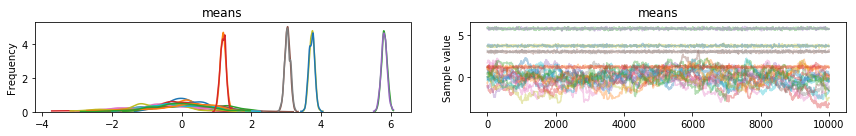

In [16]:
pymc3.plots.traceplot(tr, ['means'])

In [24]:
tr['category'][-1]

array([2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0])

In [52]:
tr['means'][700]

array([[ 5.84583038,  3.04690933,  3.66860285,  1.22634841],
       [-0.55289506, -3.28960972, -0.2332153 , -1.92456484],
       [ 2.14503043,  0.70859997,  0.24798613, -0.22623558]])

In [48]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
# Typically, we'd expect the clustering category to be the same as the target
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])